 # Prices prediction  based on the quantitative and qualitative features for Airbnb Websites
 
 
 
 <br />

<img src="http://localhost:8888/view/Downloads/AIRBNB%20logo.PNG" width = '400'> 

<br>
 
## Business Scenario
 
 *Airbnb is a website which provides home-sharing marketplace  which offers primarily homestays or tourism experience since 2008.there has been enormous growth of rentals listed on websites ever year.Rental hosting has become very interseting for heavly urbanised cities like singapore.it is also provides useful insights for policymakers and governement authorities in understanding current state of the online marlet place. 
 
*As result Airbnb is expecting to predict price based on the quantitative and qualitative features.
 
 
 ### Task is to bulid 
 
 
 *Gain at-least 5 insights on Aribnb usage using exploratory data analysis.
 
 *Bulid machine learning model that can predict the price of a listing. using RMSE as evaluation metric to tune your model.
 
 *ploting learning curves (notice Biase/variance problem).
 
 *Feature selection and Feature Engineering techniques.
 
 *Recommendations for Airbnb hosts to maximize earning.
 
 
 
 ## Attributes Information
 
 
 1- Id : (numeric)
 
 2- listing_url : detailes about rooms beds and etc.
 
 3- scrape_id :   (numeric).
 
 4- last_scraped : (numeric).
 
 5-bathrooms: Count of the bathrooms present and shared or private.

 6-bedrooms: Count of the bedrooms present.

 7-beds: Count of the beds.

 8-bed_type: Type of the bed double cart bed or single.

 9-amenities: TV, Cable TV, Air Conditioning.

 10-square_feet: Square feet of the room or hotel room spaces.
 
 11- picture_url: picture details .
 
 12- xl_picture_url: URL information about the picture source details.
 
 ## Host related Attributes
 
 13- name : host name.
 
 14-host_id: Host details.
 
 15-host_url: Host details ,URL details.
 
 16-host_name: Host name of the room, own a property rent it out and make money.
 
 17-host_since: Since when the host is part of Airbnb.
 
 18-host_location: Country Name.
 
 19-host_response_time: host response on the website.
 
 20-host_response_rate: number of inquiries to which a host has responded to within 24 hours divided by the total number of inquiries a host has received in the past 90 days.
 
 21-host_acceptance_rate: the number of answers host has received .

 22-host_thumbnail_url: Featured Image of your post, page and Custom Post Type.

 23-host_picture_url: Pictures, Family Photos.

 24-host_verifications: Verification of personal details using Government ID card, Email, Phone.

 25-host_has_profile_pic: True or False whether Host or customer have picture.

 26-host_identity_verified: True or False whether the customer haver verifies the identity of the Government ID card given or not shown.

 28-street: Singapore Street/Street name.

 29-neighbourhood: location detailes 

 30-neighbourhood_group: regions like  North, Central, East.

 31-city: location of the city.

 32-state: state in singapore.

 33-zipcode: Zipcode information which location or City (numeric).

 34-market: market of the city.

 35-smart_location: Location information or the village details in Singapore country.

 36-country_code : Country Code in Singapore. 

 37-latitude: geographical information of the location .

 38-longitude: geographical informayion of the loaction .

 39-is_location_exact: exact location or not (true or false).

 40-property_type: Type of the property house, Villa, bunglaw, Open land, bed and breakfast etc.

 41-room_type: private room or Hotel room or Shared room, how the room can be provided private or shared.

 42-accommodates:Number of the count of the members can be accomodated.

 43-price: amount spending by host.

 45-security_deposit: amount to deposit duirng the room booking.
 
 46-cleaning_fee: Maintenance fees.
 
 47-guests_included: Number of the guests to be allowed (numeric).

 48-extra_people: Number of extra people to allowed.

 49-minimum_nights: Number of minimum days.

 50-maximum_nights: Number of maximum night. 

 51-has_availability: availability check.
 
 52-instant_bookable: emergency booking.

 

## Review and License realated Attributes


 53-number_of_reviews: Number of reviews to the hotel.

 54-review_scores_rating:Scores for the rating on reviews.

 55-requires_license:True false whether license is already given to the hotel.

 56-license: License Information hotel.

 57-cancellation_policy: If cancellation is there, what is the cancelation  policy can be obtained or flexible or strict 14      days.

 58-require_guest_profile_picture: picture of the guest for verification.

 59-require_guest_phone_verification: phone number of the guest for verification.

 60-reviews_per_month:This is usually done in order to see whether it can be incressed or decressed in market place . 




## Importing needed Libraries and classes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as py
import seaborn as sns

## Importing data and understanding it

In [2]:
data=pd.read_csv("listings.csv")

In [3]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',75)

In [4]:
data.shape

(7675, 67)

### Checking whether there are records with 0 price, which needs to be removed since it is a target variable

In [5]:
data[data.price==0]

,id,listing_url,scrape_id,last_scraped,name,experiences_offered,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_group,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3078,21408571,https://www.airbnb.com/rooms/21408571,20190900000000,43733,1 BR @ Little India & Farrer Park MRT,none,NaN,NaN,https://a0.muscache.com/im/pictures/773fe5e3-8...,NaN,114674497,https://www.airbnb.com/users/show/114674497,Mitul,2017-02-03,Singapore,within an hour,0.96,NaN,f,https://a0.muscache.com/im/pictures/7d30989e-6...,https://a0.muscache.com/im/pictures/7d30989e-6...,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,"Singapore, Singapore",Little India,Central Region,Singapore,NaN,NaN,Singapore,Singapore,SG,Singapore,1.30954,103.85271,t,Condominium,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,0,0.0,15.0,1,10,3,90,t,12,9,92.0,f,NaN,NaN,t,f,moderate,f,f,4,0.65


In [6]:
data=data[data.price!=0]

In [7]:
data.shape

(7674, 67)

In [8]:
data.head(2)

,id,listing_url,scrape_id,last_scraped,name,experiences_offered,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_group,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20190900000000,43733,COZICOMFORT LONG TERM STAY ROOM 2,none,NaN,NaN,https://a0.muscache.com/im/pictures/24485541/6...,NaN,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,singapore,within a few hours,1.0,NaN,f,https://a0.muscache.com/im/pictures/94361977-2...,https://a0.muscache.com/im/pictures/94361977-2...,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Singapore, Singapore",Woodlands,North Region,Singapore,NaN,730702,Singapore,Singapore,SG,Singapore,1.44255,103.79580,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0.0,83,NaN,NaN,1,14,180,360,t,1,0,94.0,f,NaN,NaN,f,f,flexible,t,t,2,0.01
1,50646,https://www.airbnb.com/rooms/50646,20190900000000,43733,Pleasant Room along Bukit Timah,none,NaN,NaN,https://a0.muscache.com/im/pictures/36342984/6...,NaN,227796,https://www.airbnb.com/users/show/227796,Sujatha,2010-09-08,"Singapore, Singapore",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/8fd2cddb-2...,https://a0.muscache.com/im/pictures/8fd2cddb-2...,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,"Singapore, Singapore",Bukit Timah,Central Region,Singapore,NaN,589664,Singapore,Singapore,SG,Singapore,1.33235,103.78521,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,80,NaN,NaN,2,20,90,730,t,18,0,91.0,f,NaN,NaN,f,f,moderate,f,t,1,0.27


In [9]:
data.isna().sum().sum()

74290

In [10]:
data.describe()

,id,scrape_id,last_scraped,thumbnail_url,medium_url,xl_picture_url,host_id,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,7.674000e+03,7.674000e+03,7674.0,0.0,0.0,0.0,7.674000e+03,6271.000000,0.0,7674.000000,7674.000000,7674.000000,7669.000000,7672.000000,7660.000000,44.000000,7674.000000,5382.000000,5619.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,4902.000000,0.0,7674.000000,5039.000000
mean,2.356831e+07,2.019090e+13,43733.0,NaN,NaN,NaN,9.097149e+07,0.918007,NaN,1.314365,103.848852,3.410086,1.564480,1.347237,1.995953,171.090909,167.413213,250.513006,40.524471,1.989184,15.293068,18.510555,938.354444,13.301929,5.529320,90.518972,NaN,38.971723,1.043842
std,1.035762e+07,0.000000e+00,0.0,NaN,NaN,NaN,8.220789e+07,0.185228,NaN,0.030193,0.043755,2.642830,1.329531,1.133678,2.226819,257.101809,320.833943,443.557075,44.411959,1.615209,20.965811,42.793866,1662.617002,30.542344,11.649883,12.118824,NaN,65.103195,1.311588
min,4.909100e+04,2.019090e+13,43733.0,NaN,NaN,NaN,2.366600e+04,0.000000,NaN,1.242790,103.646560,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,20.000000,NaN,1.000000,0.010000
25%,1.583136e+07,2.019090e+13,43733.0,NaN,NaN,NaN,2.313690e+07,0.940000,NaN,1.296623,103.836635,2.000000,1.000000,1.000000,1.000000,0.000000,65.000000,0.000000,15.000000,1.000000,0.000000,1.000000,1124.000000,0.000000,0.000000,87.000000,NaN,2.000000,0.180000
50%,2.469275e+07,2.019090e+13,43733.0,NaN,NaN,NaN,6.335805e+07,1.000000,NaN,1.311180,103.849670,2.000000,1.000000,1.000000,1.000000,0.000000,120.000000,200.000000,35.000000,1.000000,10.000000,3.000000,1125.000000,2.000000,1.000000,94.000000,NaN,9.000000,0.540000
75%,3.267125e+07,2.019090e+13,43733.0,NaN,NaN,NaN,1.513169e+08,1.000000,NaN,1.322180,103.874840,4.000000,2.000000,2.000000,2.000000,244.750000,200.000000,300.000000,50.000000,2.000000,25.000000,14.000000,1125.000000,11.000000,5.000000,100.000000,NaN,45.000000,1.360000
max,3.889002e+07,2.019090e+13,43733.0,NaN,NaN,NaN,2.975498e+08,1.000000,NaN,1.454590,103.973420,16.000000,50.000000,50.000000,36.000000,1001.000000,10000.000000,6883.000000,822.000000,16.000000,404.000000,1000.000000,100000.000000,331.000000,164.000000,100.000000,NaN,285.000000,16.110000


In [11]:
data.describe(include='object')

,listing_url,name,experiences_offered,picture_url,host_url,host_name,host_since,host_location,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_group,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,has_availability,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,7674,7672,7674,7674,7674,7673,7670,7655,6271,7673,7673,7673,7674,7673,7673,7674,7670,7674,7598,665,6846,7583,7674,7674,7674,7674,7674,7674,7674,7674,7674,7674,4,7674,7674,7674,7674,7674
unique,7674,7244,1,7113,2640,1805,1626,226,4,2,2627,2627,195,2,2,106,42,5,44,60,2152,3,45,1,1,2,24,4,5,5830,1,1,3,2,1,6,2,2
top,https://www.airbnb.com/rooms/1131162,Luxury hostel with in-cabin locker - Single mixed,none,https://a0.muscache.com/im/pictures/b54caf56-a...,https://www.airbnb.com/users/show/66406177,Jay,2016-04-09,Singapore,within an hour,f,https://a0.muscache.com/im/pictures/user/4d120...,https://a0.muscache.com/im/pictures/user/4d120...,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,"Singapore, Singapore",Central Area,Central Region,Singapore,Singapore,399100,Singapore,Singapore,SG,Singapore,t,Apartment,Entire home/apt,Real Bed,{},t,f,201537598E,t,f,strict_14_with_grace_period,f,f
freq,1,13,7674,14,285,291,286,3723,4091,6280,285,285,1304,7659,5814,6908,1481,6120,7510,523,175,7565,7512,7674,7674,5327,3335,3511,7646,38,7674,7674,2,3883,7674,4988,7606,7592


### Identifying the columns to drop, a column which has less than 2 unique level or url in the column name or if there more than 50% of nulls in the specific column

In [12]:
lst_colstodrop =[i for  i in data.columns if (data[i].nunique()<2 or data[i].nunique()==len(data) or "_url" in i or data[i].isna().sum()/len(data) >=0.5 ) ]

In [13]:
lst_colstodrop

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'experiences_offered',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_acceptance_rate',
 'host_thumbnail_url',
 'host_picture_url',
 'state',
 'country_code',
 'country',
 'square_feet',
 'has_availability',
 'requires_license',
 'license',
 'jurisdiction_names',
 'is_business_travel_ready']

In [14]:
def drop_columns(inp_data,colname):
    inp_data.drop(colname,axis=1,inplace=True)

In [15]:
drop_columns(data,lst_colstodrop)

In [16]:
data.shape

(7674, 45)

In [17]:
#Wrote a function in ln[37] please check and try to resolve . code runs smoothly but na_values are introduced

data['host_since'] = pd.to_datetime(data['host_since'], format='%Y/%m/%d',errors='coerce')
data['current_date'] =  '2019-11-2'
data['current_date'] = pd.to_datetime(data['current_date'])
data['HostSince_NoMonths'] = (data['current_date'] - data['host_since']).dt.days
data['HostSince_NoMonths'] = (data['HostSince_NoMonths']*0.0328767).round()
data.drop(["current_date",'host_since'],axis=1,inplace=True)

In [18]:
x=data.copy().drop('price',axis=1)
y=data.price

In [19]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.3,random_state=45)

In [20]:
print("Train shape ",trainx.shape,trainy.shape)
print("Test shape ",testx.shape,testy.shape)

Train shape  (5371, 44) (5371,)
Test shape  (2303, 44) (2303,)


In [21]:
#Replacing singapore like patterns to singapore manually
trainx_updated=trainx.replace(to_replace =['Singapore, Singapore','SG','Singapore','Singapore, Singapore, Singapore','Singapore ']
             ,value ='singapore')
testx_updated=testx.replace(to_replace =['Singapore, Singapore','SG','Singapore','Singapore, Singapore, Singapore','Singapore ']
             ,value ='singapore')
trainx=trainx_updated
testx=testx_updated

In [22]:
#remaining columns in test and train
print("---Train columns---\n",list(trainx.columns))
print("---Test columns---\n",list(testx.columns))

---Train columns---
 ['name', 'host_id', 'host_name', 'host_location', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_group', 'city', 'zipcode', 'market', 'smart_location', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month', 'HostSince_NoMonths']
---Test columns---
 ['name', 'host_id', 'host_name', 'host_location', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_verifications', 'host_has_profile_pic'

In [23]:
#manually dropping few columns 
cols_to_drop=['name','host_id','host_name','host_location','host_has_profile_pic',
           'neighbourhood','zipcode','latitude','longitude','is_location_exact','bed_type',
           'number_of_reviews_ltm','calculated_host_listings_count','reviews_per_month','smart_location',
              'city','extra_people','street']
drop_columns(trainx,cols_to_drop)
drop_columns(testx,cols_to_drop)
print("train shape-----",trainx.shape,trainy.shape)
print("test shape-----",testx.shape,testy.shape)

train shape----- (5371, 26) (5371,)
test shape----- (2303, 26) (2303,)


## Comparing train and test level distribution

In [24]:
def compare_train_test(train_data, test_data):
    train_levels = train_data.apply(lambda x: set(x.unique()),axis=0)
    test_levels = test_data.apply(lambda x: set(x.unique()),axis=0)
    extra = []
    missing = []
    for x1,x2 in zip(train_levels, test_levels):
        missing.append(x1-x2)
        extra.append(x2-x1)
    
    return pd.DataFrame({"Train Data Type":train_data.dtypes, "Test Data Type":test_data.dtypes,
                         "Train #Levels":train_data.apply(lambda x: x.unique().shape[0],axis=0), 
                         "Test #Levels":test_data.apply(lambda x: x.unique().shape[0],axis=0),
                         "Test Missing":missing, "Test Extra":extra})
compare_train_test(trainx, testx)


,Train Data Type,Test Data Type,Train #Levels,Test #Levels,Test Missing,Test Extra
host_response_time,object,object,5,5,{},{}
host_response_rate,float64,float64,54,53,"{nan, 0.43, 0.29, 0.42, 0.46, 0.74}","{nan, 0.65, 0.22, 0.1, 0.3}"
host_is_superhost,object,object,2,3,{},{nan}
host_verifications,object,object,172,125,"{['email', 'phone', 'reviews', 'kba', 'work_em...","{['email', 'phone', 'reviews', 'jumio', 'work_..."
host_identity_verified,object,object,2,3,{},{nan}
neighbourhood_group,object,object,5,5,{},{}
market,object,object,4,3,{Bangkok},{}
property_type,object,object,23,21,"{Farm stay, Bus, Cabin}",{Castle}
room_type,object,object,4,4,{},{}
accommodates,int64,int64,16,16,{},{}


## handling missing levels (cancellation policy, market and properity type)


In [25]:
trainx[trainx['cancellation_policy']=='strict']

,host_response_time,host_response_rate,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_group,market,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,HostSince_NoMonths
2017,within an hour,1.0,t,"['email', 'phone', 'reviews', 'offline_governm...",f,Central Region,singapore,Condominium,Private room,1,3.0,1.0,1.0,"{TV,Wifi,""Air conditioning"",Elevator,Washer,""F...",0.0,0.0,1,2,1125,56,96.0,t,strict,f,f,48.0


In [26]:
trainx=trainx[trainx.cancellation_policy != 'strict']
trainy=trainy.drop(columns='price',index=2017,axis=0)

In [27]:
trainx['market'].value_counts(normalize=True)

singapore      0.997364
Johor Bahru    0.002448
Bangkok        0.000188
Name: market, dtype: float64

In [28]:
#since Singapore is occupying 99% of the entire market , hence dropping this column from both train and test
trainx.drop(['market'], axis=1,inplace=True)
testx.drop(['market'], axis=1,inplace=True)

In [29]:
#Replacing property_type using the reference of airbnb site

def replace_property_type(inp):
    inp['property_type'] = inp['property_type'].replace(['Apartment','Condominium','Loft','Serviced apartment'],'apartment')
    inp['property_type'] = inp['property_type'].replace(['House','Bungalow','Cabin','Chalet','Villa','Townhouse'],'house')
    inp['property_type'] = inp['property_type'].replace(['Boutique hotel','Boat','Bus','Campsite','Castle','Tent','Bed and breakfast','Other'],'unique_space')
    inp['property_type'] = inp['property_type'].replace(['Guesthouse','Guest suite','Farm stay'],'sec_unit')
    inp['property_type'] = inp['property_type'].replace(['Aparthotel','Hostel','Hotel'],'boutique_hotel')
    return inp
trainx=replace_property_type(trainx)
testx=replace_property_type(testx)

## Data Type Conversion

In [30]:
def data_conversion(inp):
    global cat_cols
    global num_cols
    cat_cols=inp.select_dtypes(include='object').columns
    num_cols=inp.columns.difference(cat_cols)
    inp[cat_cols] = inp[cat_cols].apply(lambda x: x.astype('category')) 
    inp[num_cols] = inp[num_cols].apply(lambda x: x.astype('float'))
    return inp
trainx=data_conversion(trainx)
testx=data_conversion(testx)

In [31]:
trainx.dtypes

host_response_time                  category
host_response_rate                   float64
host_is_superhost                   category
host_verifications                  category
host_identity_verified              category
neighbourhood_group                 category
property_type                       category
room_type                           category
accommodates                         float64
bathrooms                            float64
bedrooms                             float64
beds                                 float64
amenities                           category
security_deposit                     float64
cleaning_fee                         float64
guests_included                      float64
minimum_nights                       float64
maximum_nights                       float64
number_of_reviews                    float64
review_scores_rating                 float64
instant_bookable                    category
cancellation_policy                 category
require_gu

In [32]:
testx.dtypes

host_response_time                  category
host_response_rate                   float64
host_is_superhost                   category
host_verifications                  category
host_identity_verified              category
neighbourhood_group                 category
property_type                       category
room_type                           category
accommodates                         float64
bathrooms                            float64
bedrooms                             float64
beds                                 float64
amenities                           category
security_deposit                     float64
cleaning_fee                         float64
guests_included                      float64
minimum_nights                       float64
maximum_nights                       float64
number_of_reviews                    float64
review_scores_rating                 float64
instant_bookable                    category
cancellation_policy                 category
require_gu

## Imputing NA values

### Insights through visualisation

In [33]:
#imputing nulls in cat cols
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_mode = imputer_mode.fit(trainx[cat_cols])
trainx[cat_cols] = imputer_mode.transform(trainx[cat_cols])

    #imputing nulls in num cols
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_mean = imputer_mean.fit(trainx[num_cols])
trainx[num_cols] = imputer_mean.transform(trainx[num_cols])
    
testx[num_cols] = imputer_mean.transform(testx[num_cols])
testx[cat_cols] = imputer_mode.transform(testx[cat_cols])


In [34]:
trainx[num_cols].head()

,HostSince_NoMonths,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_response_rate,maximum_nights,minimum_nights,number_of_reviews,review_scores_rating,security_deposit
981,48.0,3.0,1.0,1.0,3.0,10.000000,1.0,1.000000,1125.0,2.0,167.0,97.000000,250.805136
3583,20.0,1.0,1.0,1.0,1.0,0.000000,1.0,0.919089,18.0,4.0,0.0,90.573164,132.000000
5649,43.0,2.0,1.0,1.0,1.0,0.000000,2.0,1.000000,1125.0,3.0,1.0,100.000000,0.000000
1526,62.0,4.0,2.0,2.0,2.0,60.000000,3.0,1.000000,210.0,3.0,49.0,95.000000,300.000000
6288,7.0,2.0,1.0,0.0,1.0,40.297661,1.0,1.000000,1125.0,6.0,0.0,90.573164,250.805136


In [35]:
data.host_verifications.isna().sum()

0

{'kba': 22, 'zhima_selfie': 59, 'reviews': 4902, 'government_id': 5408, 'facebook': 614, 'email': 7064, 'manual_online': 27, 'sesame': 6, 'None': 1, 'jumio': 4005, 'selfie': 2788, 'identity_manual': 2542, 'manual_offline': 104, 'sesame_offline': 6, 'offline_government_id': 3276, 'weibo': 181, 'phone': 7627, 'work_email': 1012, 'google': 432}


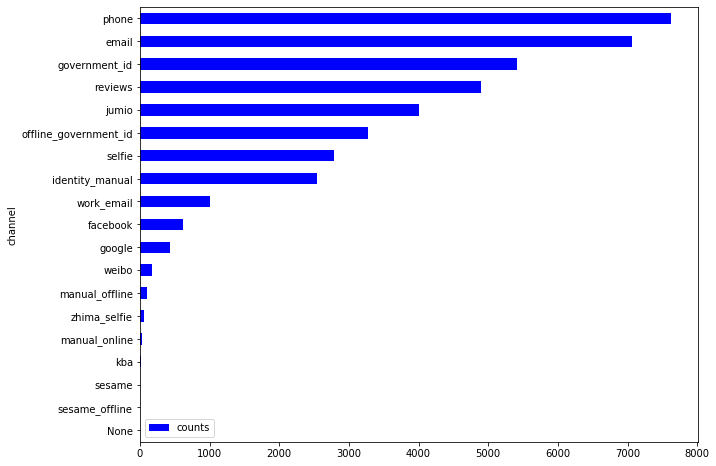

In [36]:
#To get the distinct values in the column host verifications
lst=[] 
for i in data.host_verifications:
    for j in i.split(","):
        lst.append(j.replace('[','').replace("'","").replace(']','').replace(' ',''))
st=set(lst)
lst=list(st)
ver_list=list(filter(None,lst))

#Creating an empty list to capture the channel and counts as keys and values
a={}
for i in ver_list:
    a[i]=0
for i in ver_list:
    
    for j in data.host_verifications:
        for k in j.split(","):
            #print(k.replace ("'",'').replace('[','').replace(']','').replace(' ','') , i,sep="--")
            if  k.replace ("'",'').replace('[','').replace(']','').replace(' ','')==i :
                a[i]+=1
print(a)

#Converting the Dictionary to Dataframe
df1=pd.DataFrame(list(a.items()),columns=['channel','counts'])
df1.sort_values('counts',inplace=True)

#Plotting the curves

df1.plot(kind='barh',y='counts',x='channel',color='b',figsize=(10,8))
#As the plot says that most of the hosts are using the phone ,email and goverment id as the top 3 for their verifications and 
#given less preference to the facebook and email for verifications.

In [37]:
data['Price_Bins'] = np.digitize(data.price,[0,250,10000],right=True)

In [38]:
distance_neighbourhood_group = data.groupby(['Price_Bins','neighbourhood_group']).size().unstack().reset_index().set_index('Price_Bins')

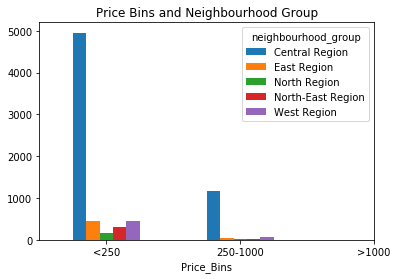

In [39]:
import matplotlib.pyplot as plt
distance_neighbourhood_group.plot(kind= 'bar',stacked=False,title = 'Price Bins and Neighbourhood Group')
plt.xticks([0,1,2],["<250","250-1000",">1000"],rotation = 0)
plt.show()

In [40]:
# Dropping host_verification as it is only useful for a business insight
drop_columns(trainx,'host_verifications')
drop_columns(testx,'host_verifications')

(0, 500)

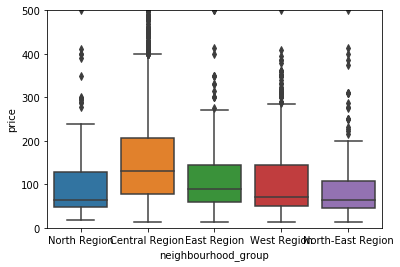

In [41]:
sns.boxplot(x="neighbourhood_group",y="price",data=data)
py.ylim([0,500])
 

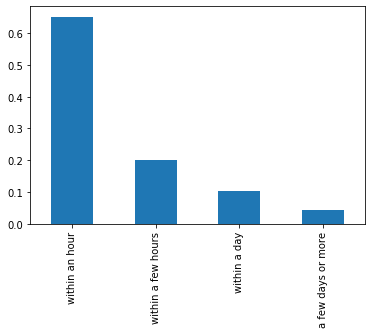

In [42]:
#Plot shows 65% of the hosts are prefering to respond with in a  hour , 20% of host are preferring to  respond with in a few hours and
# very less host are choosed to give the respose  in a few days.

data.host_response_time.value_counts(normalize=True ).plot(kind ='bar')

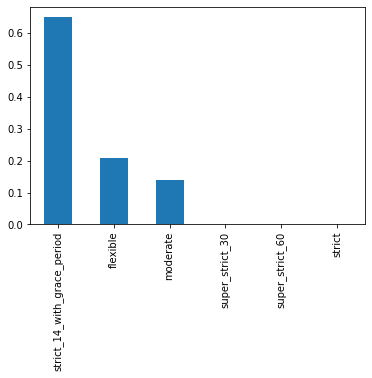

In [43]:
#Plot shows 65% of the hosts are prefering "strict_14_with_grace_period" cancellation policy, 13% of host are preferring to 
# moderate cancelation policy 

data.cancellation_policy.value_counts(normalize=True ).plot(kind ='bar')


## Feature Engineering

In [44]:
#Binning amenities into three categories : premium,basic and non_basic
def bin_amenity(inp):
    lst_amenity=[]
    basic_lst = ['TV','Cable TV','Internet','Wifi','Air conditioning','Elevator','Shampoo','Smoke detector','Fire extinguisher','Lock on bedroom door','Hangers','Hair dryer','Hot water','Luggage dropoff allowed','Long term stays allowed','Paid parking off premises','First aid kit','Refrigerator','Host greets you','Buzzer/wireless intercom','Carbon monoxide detector','24-hour check-in','Smoking allowed','Building staff',' toilet','EV charger','Hot water kettle','Babysitter recommendations','Ground floor access','Private bathroom']
    premium_lst=['Pets live on this property','Cat(s)','Washer','Pool','Kitchen','Gym','Family/kid friendly','Essentials','Dryer','Free street parking','Hot tub','Iron','Laptop friendly workspace','Self check-in','Keypad','Private entrance','Childrenâ€™s books and toys','Pets allowed','Dog(s)','Paid parking on premises','Heating','translation missing: en.hosting_amenity_50','Bed linens','Extra pillows and blankets','Ethernet connection','Microwave','Coffee maker','Dishes and silverware','Cooking basics','Oven','Stove','BBQ grill','Patio or balcony','Garden or backyard','Wheelchair accessible','Smart lock','translation missing: en.hosting_amenity_49','Pack â€™n Play/travel crib','No stairs or steps to enter','Wide entrance','Extra space around bed','Wide doorway to guest bathroom','Free parking on premises','Doorman','Safety card','Cleaning before checkout','Wide entrance for guests','Well-lit path to entrance','Accessible-height bed','Suitable for events','High chair','Crib','Single level home','Wide hallways','Flat path to guest entrance','Accessible-height toilet','Wide clearance to shower','Wide entryway','Waterfront','Beachfront','Handheld shower head','Breakfast','Bathtub','Window guards','Room-darkening shades','Disabled parking spot','Other','Changing table','Childrenâ€™s dinnerware','Dishwasher','Private living room','Lockbox','Lake access','Baby bath','Pocket wifi','Shower chair','Roll-in shower','Fixed grab bars for toilet','Indoor fireplace','Pool with pool hoist','Other pet(s)','Beach essentials','Fixed grab bars for shower','Baby monitor','Game console','Firm mattress','Outlet covers','Bathtub with bath chair','Table corner guards','Stair gates','Fireplace guards','Air purifier','Mobile hoist','Electric profiling bed','Kitchenette','Full kitchen']

    for i in inp.amenities:
        basic_cnt=0
        for j in i.split(","): 
            if j.replace('"',"").replace("{","").replace("}","") in basic_lst:
                basic_cnt += 1
        prem_cnt=0
        if basic_cnt>=4:
            prem_cnt=0
            for j in i.split(","):
                if  j.replace('"',"").replace("{","").replace("}","") in premium_lst:
                    prem_cnt+=1
        if basic_cnt >=4 and prem_cnt >=5:
            lst_amenity.append('premium')
        elif basic_cnt >=4 :
            lst_amenity.append('basic')
        else:
            lst_amenity.append('non basic')
        
    amenity_new = pd.DataFrame({'amenity_new':lst_amenity})
    sno=list(range (1,len(inp)+1))
    amenity_new['sno']=sno
    amenity_new.head()
    inp['sno']=sno
    check=pd.merge(inp, amenity_new, on='sno')
    inp=check
    inp.drop(['sno'],axis=1,inplace=True)
    drop_columns(inp,'amenities')
    return inp

trainx=bin_amenity(trainx)
testx=bin_amenity(testx)

In [45]:
testx.columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood_group', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'security_deposit', 'cleaning_fee', 'guests_included', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'HostSince_NoMonths', 'amenity_new'],
      dtype='object')

In [46]:
trainx.columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood_group', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'security_deposit', 'cleaning_fee', 'guests_included', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'HostSince_NoMonths', 'amenity_new'],
      dtype='object')

## Standardization

In [47]:
standardizer=StandardScaler()
standardizer.fit(trainx[num_cols])
trainx[num_cols]=pd.DataFrame(standardizer.transform(trainx[num_cols]),columns=num_cols)
testx[num_cols]=pd.DataFrame(standardizer.transform(testx[num_cols]),columns=num_cols)

## Dummification

In [48]:
cat_cols_1=trainx.select_dtypes(include='object').columns
trainx[cat_cols_1] = trainx[cat_cols_1].apply(lambda x: x.astype('category'))
dummy=pd.get_dummies(trainx[cat_cols_1],drop_first=True)
trainx=pd.concat([trainx[num_cols],dummy],axis=1)

In [49]:
cat_cols_1=testx.select_dtypes(include='object').columns
testx[cat_cols_1] = testx[cat_cols_1].apply(lambda x: x.astype('category'))
dummy=pd.get_dummies(testx[cat_cols_1],drop_first=True)
testx=pd.concat([testx[num_cols],dummy],axis=1)

In [50]:
print(trainx.shape)
print (testx.shape)

print(trainy.shape)
print(testy.shape)


(5370, 38)
(2303, 38)
(5370,)
(2303,)


# Model Building

## 1.Multiple Linear regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_regressor = LinearRegression()
lin_regressor.fit(trainx, trainy)
y_pred_train_LR = lin_regressor.predict(trainx)
y_pred_test_LR=lin_regressor.predict(testx)
print("R-squared value ---",metrics.r2_score(testy,y_pred_test_LR))
print("RMSE for Train ---",np.sqrt(metrics.mean_squared_error(trainy, y_pred_train_LR)))
print("RMSE for Test ---",np.sqrt(metrics.mean_squared_error(testy, y_pred_test_LR)))

R-squared value --- 0.08110733356501454
RMSE for Train --- 305.0441839894881
RMSE for Test --- 295.0578715732726


In [52]:
print('mape: ',np.mean(np.abs((trainy-y_pred_train_LR)/trainy)*100))
print('mape: ',np.mean(np.abs((testy-y_pred_test_LR)/testy)*100))

mape:  72.31789923625198
mape:  72.24763137841786


([121285.12762207993,
  105725.8069403287,
  148916.68729077812,
  117081.32587475625,
  136019.0429164716,
  139894.65506445654,
  124723.56889738911,
  111604.96030441734,
  101581.11241051121,
  93051.95418581266],
 [155778.96395493092,
  108165.4811205105,
  100858.57378825203,
  94717.38027099674,
  92508.57068282877,
  89459.00905775903,
  88462.29884770054,
  88174.27362150572,
  87557.89827737989,
  87059.14757734984])

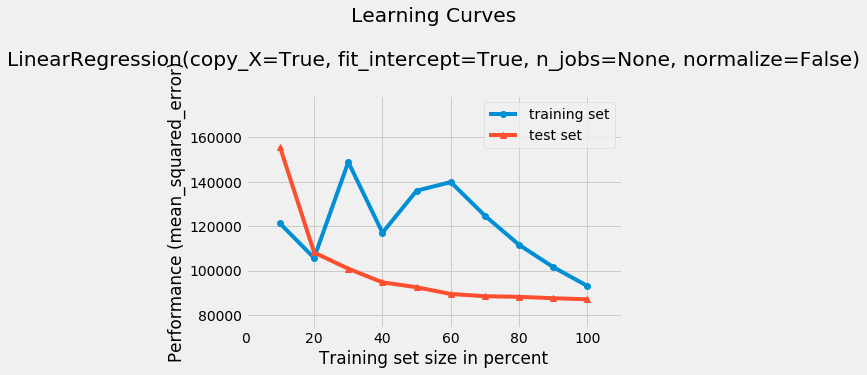

In [53]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(trainx, trainy, testx, testy, lin_regressor, scoring='mean_squared_error')

## 2.Decision Tree regression

In [54]:
from sklearn.model_selection import GridSearchCV
parameters={ "max_depth":np.arange(3,10,1), "min_samples_split":np.arange(0.001,0.1,0.001),"max_leaf_nodes":np.arange(5,20,1)}

In [55]:
from sklearn.tree import DecisionTreeRegressor
#dt= GridSearchCV(DecisionTreeRegressor(),param_grid=parameters, cv=5,  n_jobs=-1)
dt=DecisionTreeRegressor()
dt.fit(trainx, trainy)
y_pred_train_dt = dt.predict(trainx)
y_pred_test_dt=dt.predict(testx)
print("RMSE for Train ---",np.sqrt(metrics.mean_squared_error(trainy, y_pred_train_dt)))

print("RMSE for Test ---",np.sqrt(metrics.mean_squared_error(testy, y_pred_test_dt)))

RMSE for Train --- 26.762071299034243
RMSE for Test --- 440.1604673539558


In [56]:
print('mape: ',np.mean(np.abs((trainy-y_pred_train_dt)/trainy)*100))
print('mape: ',np.mean(np.abs((testy-y_pred_test_dt)/testy)*100))

mape:  0.7755282758594322
mape:  80.96321363017125


([35.80757293606455,
  3281.119180633147,
  2211.2630871094557,
  1669.2920501906535,
  1337.0616930477963,
  1130.8381403150956,
  988.3633147113593,
  870.6936763549091,
  782.8377859597869,
  716.2084602145924],
 [227864.17449462056,
  218563.32748347567,
  289619.83853789745,
  300536.40888059593,
  373030.1961809099,
  61733.64470600558,
  335622.33549669513,
  244020.97553266838,
  346001.4167208488,
  177357.78437494612])

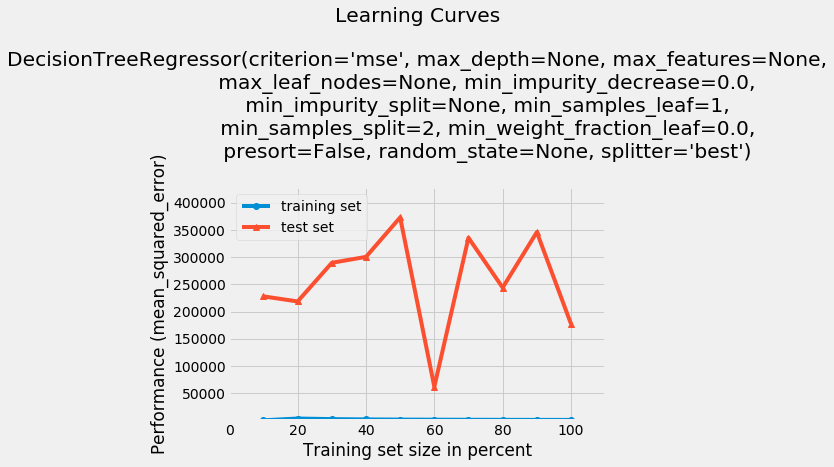

In [57]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(trainx, trainy, testx, testy, dt , scoring='mean_squared_error')

## 3.GradientBoostingRegressor

In [58]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
#gbm= GridSearchCV(GradientBoostingRegressor(),param_grid=parameters, cv=5,  n_jobs=-1)
gbm=GradientBoostingRegressor()
gbm.fit(X=trainx, y=trainy)
y_pred_train_gbm = gbm.predict(trainx)
y_pred_test_gbm=gbm.predict(testx)
print("RMSE for Train ---",np.sqrt(metrics.mean_squared_error(trainy, y_pred_train_gbm)))
print("RMSE for Test ---",np.sqrt(metrics.mean_squared_error(testy, y_pred_test_gbm))) 


RMSE for Train --- 226.75382341371827
RMSE for Test --- 302.38424447082696


([8766.7683922249,
  11335.041415617574,
  50481.206206193376,
  37149.82062312147,
  70681.31679107917,
  66012.38710912543,
  65205.93706890053,
  57469.68956345002,
  55632.787115891835,
  51417.29643273972],
 [161407.9373713624,
  136578.4380301493,
  105276.1669192673,
  112693.35359772708,
  98470.2697906955,
  97355.60640263786,
  94721.38733159896,
  99935.72671318715,
  96196.76144640814,
  91047.61561370977])

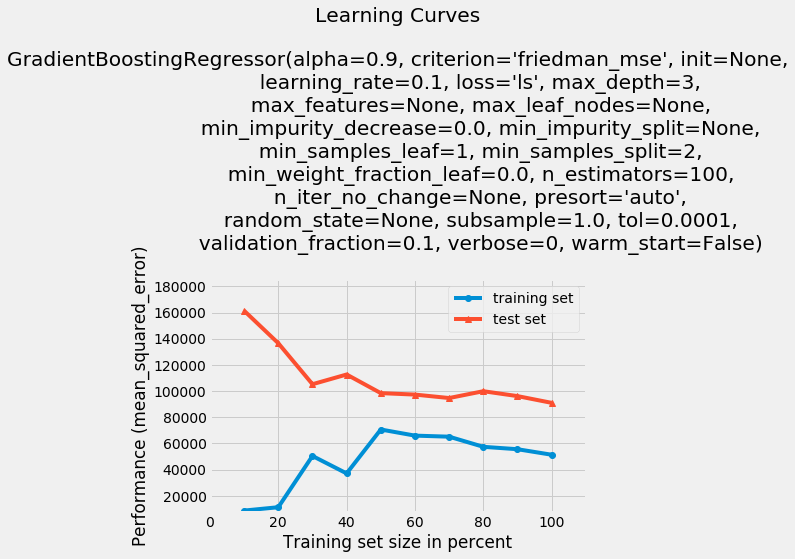

In [60]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(trainx, trainy, testx, testy, gbm, scoring='mean_squared_error')

## 4.RandomForestRegressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
#rfr= GridSearchCV(RandomForestRegressor(),param_grid=parameters, cv=5,  n_jobs=-1)
rfr=RandomForestRegressor()
rfr.fit(trainx,trainy)
y_pred_train_rfr = rfr.predict(trainx)
y_pred_test_rfr=rfr.predict(testx)
print("RMSE for Train ---",np.sqrt(metrics.mean_squared_error(trainy, y_pred_train_rfr)))

print("RMSE for Test ---",np.sqrt(metrics.mean_squared_error(testy, y_pred_test_rfr)))

RMSE for Train --- 155.24399761246568
RMSE for Test --- 320.4847327340422


([22628.64391232154,
  19925.21816769827,
  35120.52391301306,
  41812.265223248156,
  30042.33222118266,
  33952.863476940634,
  29413.162732751145,
  25784.560372353233,
  23059.288592866906,
  22657.591806088592],
 [165947.08901429296,
  137353.4990745048,
  129678.7185453515,
  103300.55764601465,
  150501.83345403295,
  117749.24142526889,
  126697.62179976124,
  119225.68025704319,
  112497.91726104842,
  108600.90961142848])

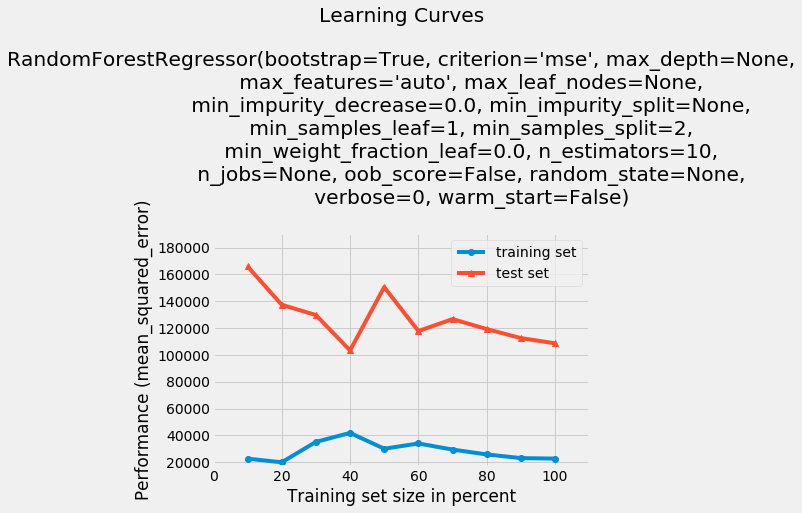

In [62]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(trainx, trainy, testx, testy, rfr, scoring='mean_squared_error')

# 5.Multiple Linear regression with Square root transformations

## Applying square root on target variables of train and test

In [63]:
train_sqrt=np.sqrt(trainy)
test_sqrt=np.sqrt(testy)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_regressor = LinearRegression()
lin_regressor.fit(trainx, train_sqrt)
y_pred_train_LR = (lin_regressor.predict(trainx))**2
y_pred_test_LR=(lin_regressor.predict(testx))**2

print("R-squared value ---",metrics.r2_score(testy,y_pred_test_LR))
print("RMSE for Train ---",np.sqrt(metrics.mean_squared_error(train_sqrt, y_pred_train_LR)))
print("RMSE for Test ---",np.sqrt(metrics.mean_squared_error(test_sqrt, y_pred_test_LR)))

R-squared value --- 0.09985205673125441
RMSE for Train --- 169.55008115035227
RMSE for Test --- 162.38688759883917


In [65]:
print('mape: ',np.mean(np.abs((trainy-y_pred_train_LR)/trainy)*100))
print('mape: ',np.mean(np.abs((testy-y_pred_test_LR)/testy)*100))

mape:  45.01855923645448
mape:  44.39018061054105


([25.496894310472346,
  22.4939728370585,
  28.93958500997149,
  23.89745897601196,
  25.40781008373341,
  25.223846071670337,
  23.45779177231335,
  21.943651114685892,
  20.575730709891374,
  19.482547259562427],
 [24.142068527070723,
  18.351247801389736,
  17.317301266659797,
  16.165705749714682,
  15.681536967194747,
  15.350347168768465,
  15.203550358355482,
  15.259491830991623,
  15.150000575036925,
  15.059581270627659])

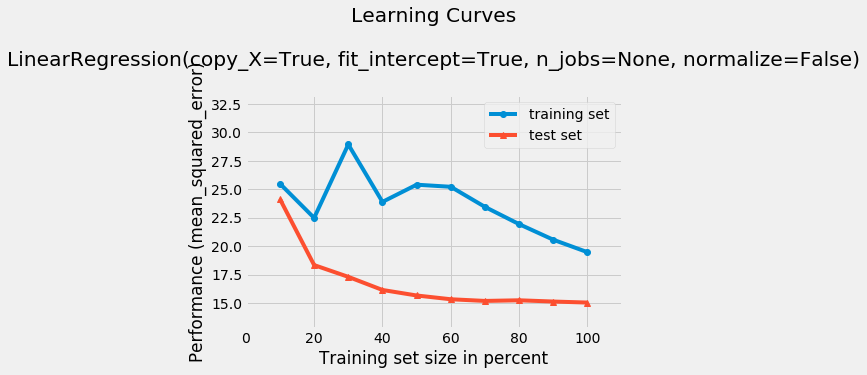

In [66]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(trainx, train_sqrt, testx, test_sqrt, lin_regressor, scoring='mean_squared_error')

## 6.Decision Tree regression with  Square root transformation

RMSE for Train --- 203.63871014274295
RMSE for Test --- 209.08042995091006


([11.1301933916771,
  11.316717440608668,
  20.407236123630813,
  17.361685143674805,
  18.14770021792066,
  19.47292218058746,
  18.43993352841964,
  17.055102527744218,
  16.043224231150663,
  15.437481565491364],
 [38.8474825438429,
  31.414680066437114,
  30.087161774308008,
  23.185848798031696,
  23.103174364076416,
  23.716825089903363,
  21.26453231366743,
  21.704760120235253,
  22.085798696512413,
  19.257713525675197])

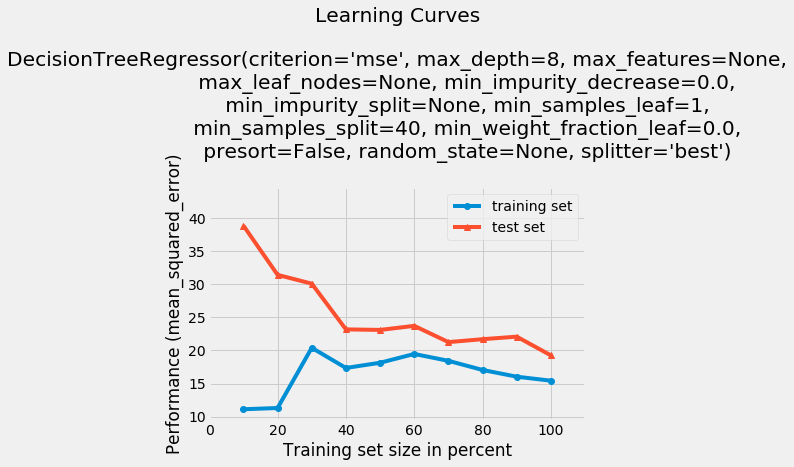

In [67]:
from sklearn.tree import DecisionTreeRegressor
#dt= GridSearchCV(DecisionTreeRegressor(),param_grid=parameters, cv=5,  n_jobs=-1)
dt=DecisionTreeRegressor(max_depth=8,min_samples_split=40,)
dt.fit(trainx, train_sqrt)
y_pred_train_dt = (dt.predict(trainx))**2
y_pred_test_dt=(dt.predict(testx))**2




print("RMSE for Train ---",np.sqrt(metrics.mean_squared_error(train_sqrt, y_pred_train_dt)))
print("RMSE for Test ---",np.sqrt(metrics.mean_squared_error(test_sqrt, y_pred_test_dt)))


from mlxtend.plotting import plot_learning_curves

plot_learning_curves(trainx, train_sqrt, testx, test_sqrt, dt , scoring='mean_squared_error')


## 7.GradientBoostingRegressor with Square root transformation

In [68]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error


#gbm= GridSearchCV(GradientBoostingRegressor(),param_grid=parameters, cv=5,  n_jobs=-1)
gbm=GradientBoostingRegressor(max_depth=5,max_leaf_nodes=10,n_estimators=25)
gbm.fit(X=trainx, y=train_sqrt)
y_pred_train_gbm =( gbm.predict(trainx))**2
y_pred_test_gbm=(gbm.predict(testx))**2



print("RMSE for Train ---",np.sqrt(metrics.mean_squared_error(train_sqrt, y_pred_train_gbm)))
print("RMSE for Test ---",np.sqrt(metrics.mean_squared_error(test_sqrt, y_pred_test_gbm))) 



RMSE for Train --- 179.57206795891062
RMSE for Test --- 165.1752898426728


([9.662625920567269,
  10.133762834974357,
  17.538376345225622,
  15.856377179536393,
  18.224886503031467,
  17.839947830064478,
  16.944087713257872,
  15.92927088389106,
  15.400155633270577,
  14.85234471555276],
 [22.38456087407935,
  23.603005191200154,
  20.26044858237383,
  16.903626095853983,
  15.861068221572271,
  16.016903947383806,
  15.905300483325327,
  15.843840672417047,
  15.825970669358153,
  15.868737499476685])

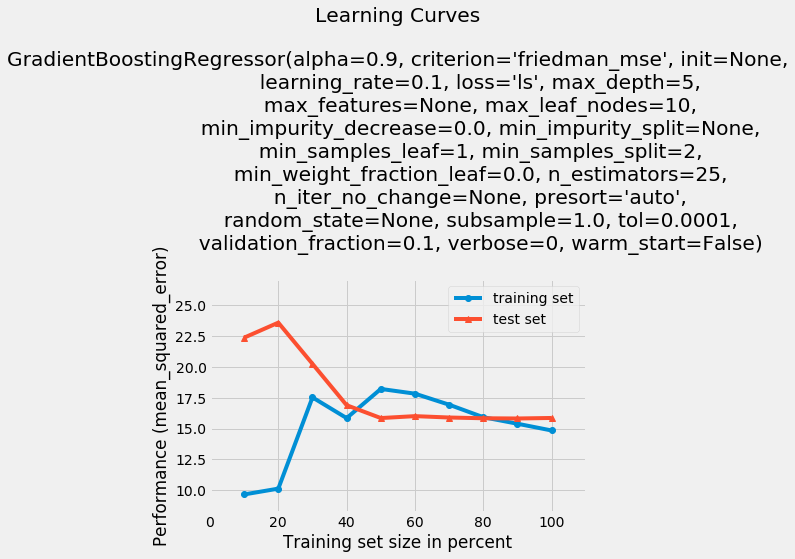

In [69]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(trainx, train_sqrt, testx, test_sqrt, gbm, scoring='mean_squared_error')

## 8.RandomForestRegressor with Square root transformation

RMSE for Train --- 184.02518951218786
RMSE for Test --- 177.6077154327729


([22.434650973296907,
  15.185029355774704,
  17.722433425019563,
  14.503350307703764,
  14.746727910347072,
  13.212760799668263,
  12.400557596084884,
  11.19275404984932,
  10.243127744535935,
  9.578771756488885],
 [15.732297317413648,
  14.503871046814677,
  14.515012794352517,
  13.857817266011505,
  13.297719813035954,
  13.341808673293624,
  13.247287176613309,
  13.235553903359289,
  13.260439741459907,
  12.432511677159374])

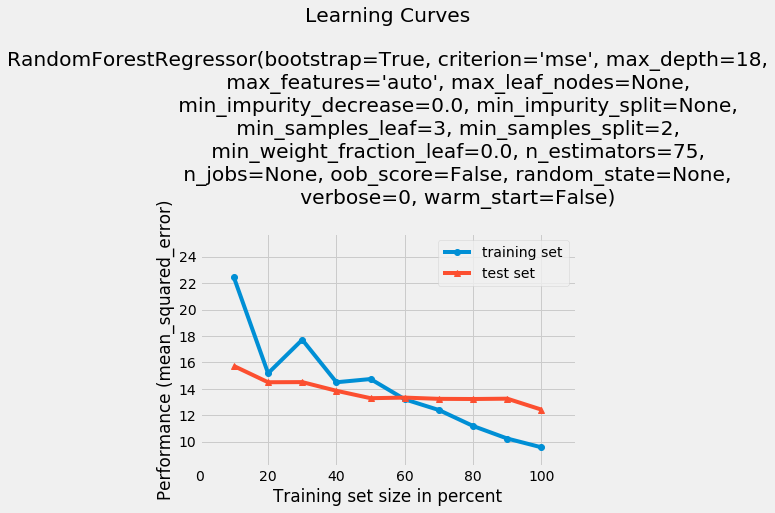

In [70]:
from sklearn.ensemble import RandomForestRegressor
#rfr= GridSearchCV(RandomForestRegressor(),param_grid=parameters, cv=5,  n_jobs=-1)
rfr=RandomForestRegressor(max_depth=18,min_samples_leaf=3,min_samples_split=2,n_estimators=75)
rfr.fit(trainx,train_sqrt)
y_pred_train_rfr = (rfr.predict(trainx))**2
y_pred_test_rfr=(rfr.predict(testx))**2



print("RMSE for Train ---",np.sqrt(metrics.mean_squared_error(train_sqrt, y_pred_train_rfr)))
print("RMSE for Test ---",np.sqrt(metrics.mean_squared_error(test_sqrt, y_pred_test_rfr)))

from mlxtend.plotting import plot_learning_curves

plot_learning_curves(trainx, train_sqrt, testx, test_sqrt, rfr, scoring='mean_squared_error')

## 9.Xgboost with Square root transformation

In [71]:
#!pip install xgboost

from xgboost import XGBRegressor
#xgb= GridSearchCV(XGBRegressor(),param_grid=parameters, cv=5,  n_jobs=-1)
xgb=XGBRegressor(max_depth=4,n_estimators=250)
xgb.fit(trainx,train_sqrt)
y_pred_train_xgb = (xgb.predict(trainx))**2
y_pred_test_xgb=(xgb.predict(testx))**2



print("RMSE for Train ---",np.sqrt(metrics.mean_squared_error(train_sqrt, y_pred_train_xgb)))
print("RMSE for Test ---",np.sqrt(metrics.mean_squared_error(test_sqrt, y_pred_test_xgb)))



[07:58:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE for Train --- 241.43225872800932
RMSE for Test --- 184.49996236755723


[07:58:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:47] WARNI

([1.393300110605847,
  2.6070988779673114,
  4.828159989956567,
  4.786385822432432,
  6.213416546281508,
  7.551496857408915,
  7.312092700107653,
  7.191514926668605,
  6.831082841537786,
  7.006236437806123],
 [23.21885770589219,
  19.75222578100775,
  20.383007893428577,
  16.920038930503793,
  16.796678560915957,
  15.413476201597073,
  14.382916287869858,
  14.151350744395112,
  13.72678778697886,
  13.915847213981202])

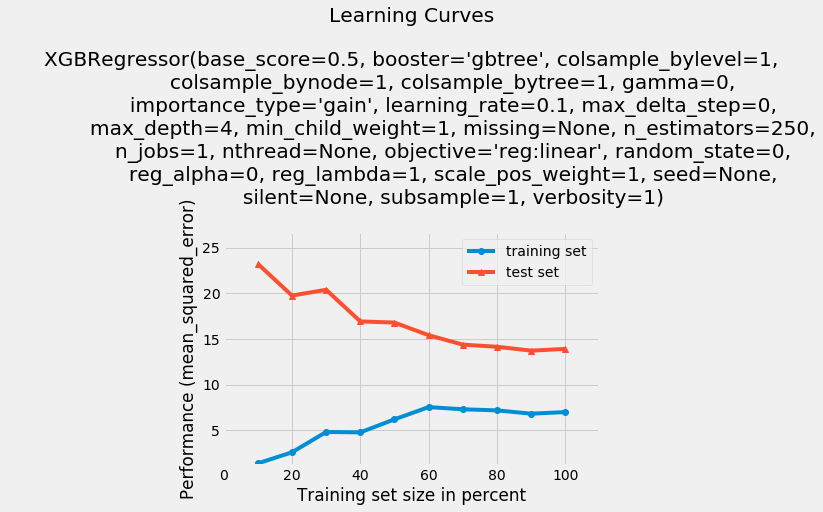

In [72]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(trainx, train_sqrt, testx, test_sqrt, xgb, scoring="mean_squared_error")

In [74]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lss = Lasso()
lss.fit(trainx,train_sqrt)
y_pred_train_lss = (lss.predict(trainx))**2
y_pred_test_lss=(lss.predict(testx))**2
print("RMSE for Train ---",np.sqrt(metrics.mean_squared_error(train_sqrt, y_pred_train_lss)))
print("RMSE for Test ---",np.sqrt(metrics.mean_squared_error(test_sqrt, y_pred_test_lss)))


RMSE for Train --- 135.2042916478391
RMSE for Test --- 133.0798605899789


([33.96954787825705,
  31.913439977282216,
  37.13493105415733,
  31.262048738869225,
  32.237439036286325,
  31.84467422379031,
  29.72650084580749,
  27.969008333062153,
  26.360206145955885,
  25.127594314677488],
 [22.707217235301073,
  21.01973025048378,
  21.236586108903786,
  20.950569641275408,
  20.827561254862758,
  20.986400606063498,
  20.738445095988617,
  20.71783294288165,
  20.6286552645848,
  20.606416800065425])

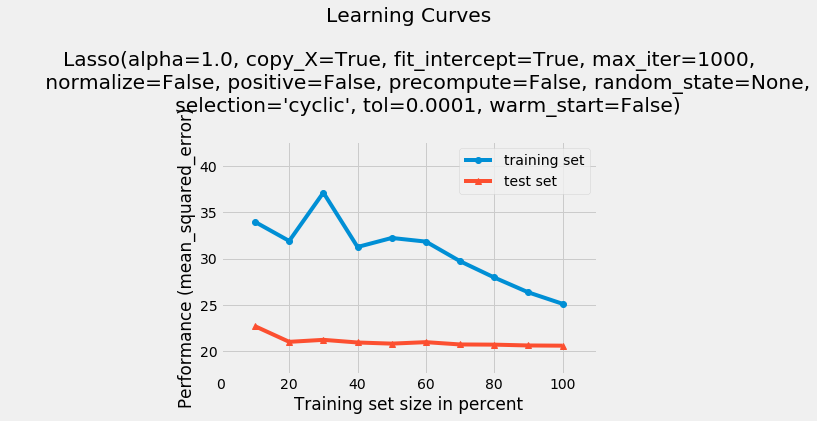

In [75]:
plot_learning_curves(trainx, train_sqrt, testx, test_sqrt, lss, scoring="mean_squared_error")